# Получение всех ревью при помощи скрапинга. Python

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
def GetReviewContent(url):
    params = {
      'ref_': 'undefined',
      'paginationKey': ''
    }

    ratings = []
    reviewers = []
    contents = []

    with requests.Session() as s:
      s.headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36'
      res = s.get(url)

      while True:
        soup = BeautifulSoup(res.text,"lxml")
        
        for item in soup.select(".review-container"):
          try:
            ratings.append(item.select_one(".rating-other-user-rating > span").get_text(strip=True))
            reviewers.append(item.select_one("span.display-name-link > a").get_text(strip=True))
            contents.append(item.select_one(".content > .text").get_text(strip=True))
          except AttributeError:
            continue

        try:
          pagination_key = soup.select_one(".load-more-data[data-key]").get("data-key")
        except AttributeError:
          break

    df = pd.DataFrame()

    df['ratings'] = ratings
    df['reviewers'] = reviewers
    df['contents'] = contents

    return df

Следующие фильмы явяляются концом списка топ 250 imdb

In [ ]:
url_1 = 'https://www.imdb.com/title/tt0330373/reviews?ref_=tt_urv' # Harry Potter and the Goblet of Fire
url_2 = 'https://www.imdb.com/title/tt3183660/reviews?ref_=tt_urv' # Fantastic Beasts and Where to Find Them
url_3 = 'https://www.imdb.com/title/tt2953050/reviews?ref_=tt_urv' # Enchanto
url_4 = 'https://www.imdb.com/title/tt1217209/reviews?ref_=tt_urv' # Brave
url_5 = 'https://www.imdb.com/title/tt6443346/reviews?ref_=tt_urv' # Black Adam

df1 = GetReviewContent(url_1)
df2 = GetReviewContent(url_2)
df3 = GetReviewContent(url_3)
df4 = GetReviewContent(url_4)
df5 = GetReviewContent(url_5)

# Оценка тональности текстов

In [ ]:
!pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 401 kB 14.2 MB/s 
     |████████████████████████████████| 5.5 MB 69.5 MB/s 
     |████████████████████████████████| 46 kB 850 kB/s 
     |████████████████████████████████| 981 kB 52.4 MB/s 
     |████████████████████████████████| 53 kB 1.1 MB/s 
     |████████████████████████████████| 182 kB 58.0 MB/s 
     |████████████████████████████████| 788 kB 57.3 MB/s 
     |████████████████████████████████| 1.6 MB 49.6 MB/s 
     |████████████████████████████████| 1.2 MB 39.5 MB/s 
     |████████████████████████████████| 19.7 MB 200 kB/s 
     |████████████████████████████████| 200 kB 60.9 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 7.6 MB 48.6 MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=bfb308f23a31c2907c7863686bee98513668fe6621a41884ff382cf60affa270
  Stor

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence

sia = TextClassifier.load('en-sentiment')

2022-11-30 06:07:01,689 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmp5g__s5jc


100%|██████████| 265512723/265512723 [00:06<00:00, 40352919.80B/s]

2022-11-30 06:07:08,351 copying /tmp/tmp5g__s5jc to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-11-30 06:07:09,081 removing temp file /tmp/tmp5g__s5jc
2022-11-30 06:07:09,128 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "positive"
    elif "NEGATIVE" in str(score):
        return "negative"
    else:
        return "neutral"

In [ ]:
def add_id(x):
    if x == "positive":
        return 2.0
    elif x == "negative":
        return 1.0
    else:
        return 0

In [ ]:
df1["sentiment"] = df1["contents"].apply(flair_prediction)
df2["sentiment"] = df2["contents"].apply(flair_prediction)
df3["sentiment"] = df3["contents"].apply(flair_prediction)
df4["sentiment"] = df4["contents"].apply(flair_prediction)
df5["sentiment"] = df5["contents"].apply(flair_prediction)

In [ ]:
df1["sentiment_id"] = df1["sentiment"].apply(add_id)
df2["sentiment_id"] = df2["sentiment"].apply(add_id)
df3["sentiment_id"] = df3["sentiment"].apply(add_id)
df4["sentiment_id"] = df4["sentiment"].apply(add_id)
df5["sentiment_id"] = df5["sentiment"].apply(add_id)

In [ ]:
# Преобразование типов к int
df1['ratings'] = df1['ratings'].astype(str).astype(float)
df2['ratings'] = df2['ratings'].astype(str).astype(float)
df3['ratings'] = df3['ratings'].astype(str).astype(float)
df4['ratings'] = df4['ratings'].astype(str).astype(float)
df5['ratings'] = df5['ratings'].astype(str).astype(float)

In [ ]:
# Harry Potter and the Goblet of Fire
df1

,ratings,reviewers,contents,sentiment,sentiment_id
0,6.0,cosmic_quest,Based on one of the best books of the Harry Po...,positive,2.0
1,6.0,questl-18592,While Prisoner was a step forward I alway felt...,negative,1.0
2,8.0,imdb-10900,It's unfortunate that so much of the book need...,negative,1.0
3,8.0,TheLittleSongbird,I liked this film very much. It is much darker...,negative,1.0
4,7.0,em_1986,"As a fan of the potter book series, I'm going ...",negative,1.0
5,9.0,Lady_Targaryen,''Harry Potter and the Goblet of Fire'' is the...,negative,1.0
6,8.0,ma-cortes,"This fourth installment of J.K. Rowling saga ,...",positive,2.0
7,6.0,TheScraggler,"Before I review the film, let me start off by ...",negative,1.0
8,10.0,joestank15,Harry Potter and the Goblet of Fire - Harry (D...,positive,2.0
9,4.0,cryptkeeper3000,"I have to say, I'm really disappointed in how ...",negative,1.0


In [ ]:
# Fantastic Beasts and Where to Find Them
df2

,ratings,reviewers,contents,sentiment,sentiment_id
0,4.0,heatsink98,It's a letdown. The fun and charming bits of H...,negative,1.0
1,6.0,paul_haakonsen,"I watched the movie back in 2016, when it was ...",negative,1.0
2,7.0,hcarljohan,I really want to draw attention to the title o...,positive,2.0
3,4.0,antoniokowatsch,I have to say that I am really disappointed of...,negative,1.0
4,3.0,Leofwine_draca,FANTASTIC BEASTS AND WHERE TO FIND THEM is the...,negative,1.0
5,6.0,Horst_In_Translation,"""Fantastic Beasts and Where to Find Them"" is a...",negative,1.0
6,8.0,TheLittleSongbird,"Having grown up with the Harry Potter books, a...",positive,2.0
7,8.0,moviexclusive,How do you make a 'Harry Potter' movie without...,positive,2.0
8,6.0,TheOneThatYouWanted,Meh. Just meh. This film looks like a 50 dolla...,negative,1.0
9,3.0,studioAT,"J.K Rowling, not content with having milked 'H...",negative,1.0


In [ ]:
# Enchanto
df3

,ratings,reviewers,contents,sentiment,sentiment_id
0,7.0,djurrepower,Somehow I feel like this movie isn't finished....,negative,1.0
1,7.0,lee_eisenberg,"I interpreted ""Encanto"" to mean that one's str...",positive,2.0
2,7.0,cricketbat,Encanto is a creative movie featuring beautifu...,positive,2.0
3,9.0,SnoopyStyle,The Madrigals live in a magic house under the ...,positive,2.0
4,9.0,masonsaul,Encanto is another Incredible Disney animated ...,positive,2.0
5,5.0,actaction,"It keeps talking about magic ending, because o...",negative,1.0
6,10.0,matthewssilverhammer,While it has some of the current Disney tropes...,positive,2.0
7,5.0,Sandra-durand80,"The animation is beautiful, bright and colorfu...",negative,1.0
8,6.0,KiParvizi,"Though I usually tend to love Disney films, I ...",negative,1.0
9,5.0,MissSimonetta,"When someone calls a movie ""cute"" in my social...",negative,1.0


In [ ]:
# Brave
df4

,ratings,reviewers,contents,sentiment,sentiment_id
0,5.0,Mr-Fusion,"I dunno what to make of ""Brave"". It says PIXAR...",negative,1.0
1,6.0,ironhorse_iv,"The animation is beautiful, but it looks like ...",negative,1.0
2,7.0,planktonrules,"While I must admit that ""Brave"" is not among m...",positive,2.0
3,7.0,auuwws,"Nice movie, not the best Pixar movie, but I re...",positive,2.0
4,8.0,cadillac20,Brave is a film I've been looking forward to s...,positive,2.0
5,1.0,cultfilmfreaksdotcom,This is the epitome of burying the lead But t...,negative,1.0
6,8.0,Loving_Silence,Brave is a beautiful and moving new fairy tale...,positive,2.0
7,3.0,BigWhiskers,This movie is definitely for women in general....,negative,1.0
8,7.0,Joe_Chadowski,This should have been an easy review to write....,negative,1.0
9,8.0,AustinOswald,"After last years Cars 2, many began to underes...",positive,2.0


In [ ]:
# Black Adam
df5

,ratings,reviewers,contents,sentiment,sentiment_id
0,8.0,Top_Dawg_Critic,"I will admit I had my doubts casting Johnson, ...",negative,1.0
1,8.0,HabibieHakim123,"Black Adam is not without its flaws, but i sti...",positive,2.0
2,7.0,namob-43673,In the superhero movie genre I would rank this...,negative,1.0
3,8.0,jvg37,"Having Saw Black Adam 2 days ago, I can say th...",positive,2.0
4,8.0,Rasalgheti_2000,This could have been another generic superhero...,positive,2.0
5,8.0,AvionPrince16,What a movie! The special effects are really i...,positive,2.0
6,8.0,migellepatterson,It was a good superhero film the best one of t...,negative,1.0
7,7.0,Couchkik20,Black Adam is the perfect example of how inacc...,positive,2.0
8,9.0,beandip57,"To say Black Adam kills it, is an understateme...",positive,2.0
9,7.0,Xstal,"There's a superhero rogue packed full of rage,...",positive,2.0


Графики, отображающие статистики

Фильм "Harry Potter and the Goblet of Fire"

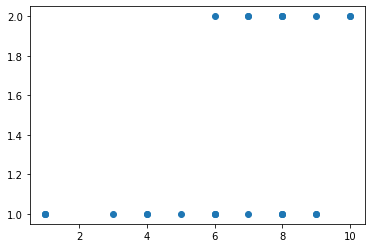

In [ ]:
x1 = df1['ratings']
y1 = df1['sentiment_id']
plt.scatter(x1, y1)

Фильм "Fantastic Beasts and Where to Find Them"

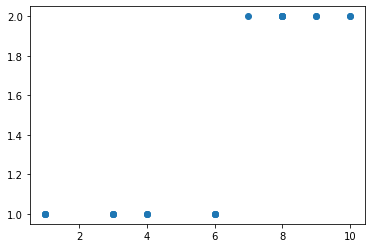

In [ ]:
x2 = df2['ratings']
y2 = df2['sentiment_id']
plt.scatter(x2, y2)

Фильм "Enchanto"

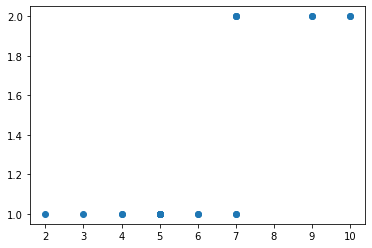

In [ ]:
x3 = df3['ratings']
y3 = df3['sentiment_id']
plt.scatter(x3, y3)

Фильм "Brave"

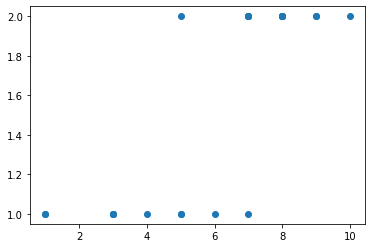

In [ ]:
x4 = df4['ratings']
y4 = df4['sentiment_id']
plt.scatter(x4, y4)

Фильм "Black Adam"

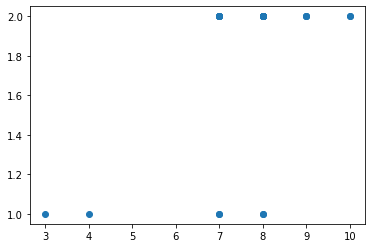

In [ ]:
x5 = df5['ratings']
y5 = df5['sentiment_id']
plt.scatter(x5, y5)